In [1]:
import numpy as np
import json_tricks
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
### YOUR CODE HERE ###

In [3]:
def reconstruct(A, b):
    U, s, VT = np.linalg.svd(A)
    results = []
    for i in range(1, len(s) + 1, 16):
        S_inv = np.diag(1 / s[:i])
        x_approx = VT.T[:, :i] @ S_inv @ U.T[:i, :] @ b
        x_approx = x_approx.flatten()  
        results.append(x_approx)
    return results, U, s, VT

In [7]:
inputs = json_tricks.load('.inputs.json')
A = inputs['A']
b = inputs['b']
# print(inputs)

x_rec, U, s, VT = reconstruct(A, b)

json_tricks.dump(x_rec, '.answer.json')

'[{"__ndarray__": [[126.25743179930603], [136.26504734684386], [146.66387498417555], [154.60176380983467], [163.96067004047117], [173.98238190060033], [179.36899062422225], [187.0745387338785], [189.52918375760433], [188.6373591743269], [188.6373591743263], [189.5291837576027], [187.0745387338758], [179.3689906242186], [173.98238190059618], [163.96067004046654], [154.60176380983006], [146.6638749841702], [136.2650473468378], [126.25743179930232], [134.57383947742682], [147.37620986607013], [160.58016030561424], [172.51374333654027], [186.45597835449541], [198.9939226771707], [202.94454022671388], [208.91627569004953], [215.859312478443], [219.19967663184235], [219.1996766318415], [215.85931247844064], [208.91627569004555], [202.9445402267089], [198.99392267716487], [186.45597835448922], [172.51374333653422], [160.58016030560833], [147.3762098660645], [134.5738394774217], [142.1511720032828], [159.4164327649186], [175.46726980968816], [191.90411480062545], [206.64081487313655], [216.303

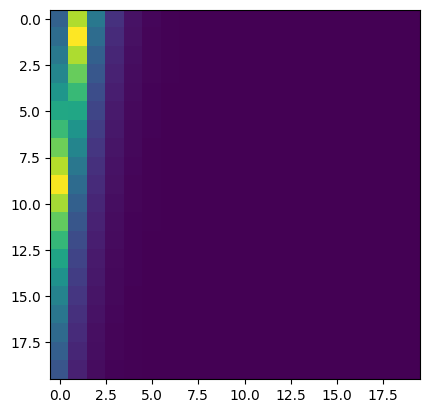

In [8]:
# Visualization of rays
plt.imshow(A[20, :].reshape([20, 20]))

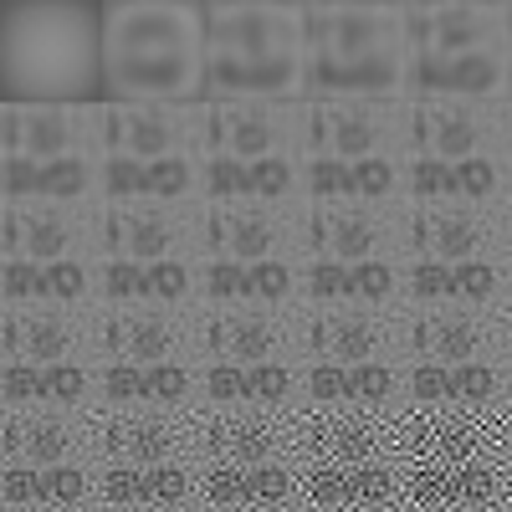

In [9]:
results = []
for index in range(len(x_rec)):
    results.append(x_rec[index].reshape([20, 20]))

results_2 = []
for index in range(5):
    results_2.append(np.concatenate(results[index::5], axis=0))

results = np.concatenate(results_2, axis=1)
results = (results - results.min()) / (results.max() - results.min()) * 255

import PIL
PIL.Image.fromarray(results.astype("uint8")).resize([512, 512])


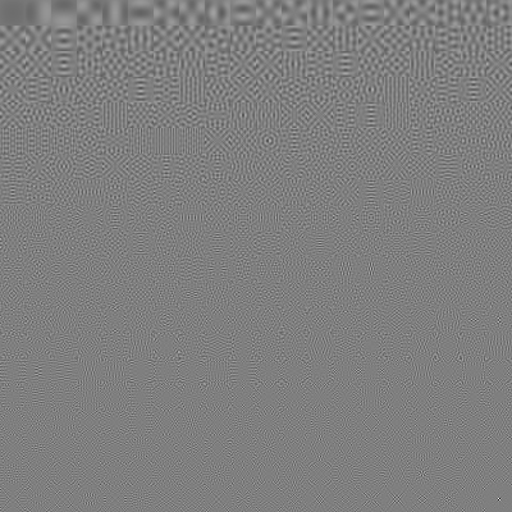

In [10]:
right_hand_vectors = VT

results = []
for index in range(0, VT.shape[1]):
    results.append(VT[index, :].reshape([20, 20]))

results_2 = []
for index in range(20):
    results_2.append(np.concatenate(results[index::20], axis=0))

results = np.concatenate(results_2, axis=1)
results = (results - results.min()) / (results.max() - results.min()) * 255

import PIL
PIL.Image.fromarray(results.astype("uint8")).resize([512, 512])

In [1]:
## YOUR EXPERIMENTS HERE